# Extraindo noticias com Web Scraping
O estagiário da sua área de trabalho busca, todos os dias, os titulos e links das noticias do dia, para enviar para sua chefia.
Você quer ajudar na automatização dessa tarefa.

Crie um código que liste para você os títulos e os links das 15 notícias top globo (observe que são 5 sobre jornalismo, 5 de esportes e 5 de entretenimento) que aparecem na parte final do site do https://www.globo.com/ (conforme figura abaixo). Toda vez que o código for executado ele trará as notícias do momento atual, evitando a necessidade de estar sempre acessando o site.

Utilize web scraping

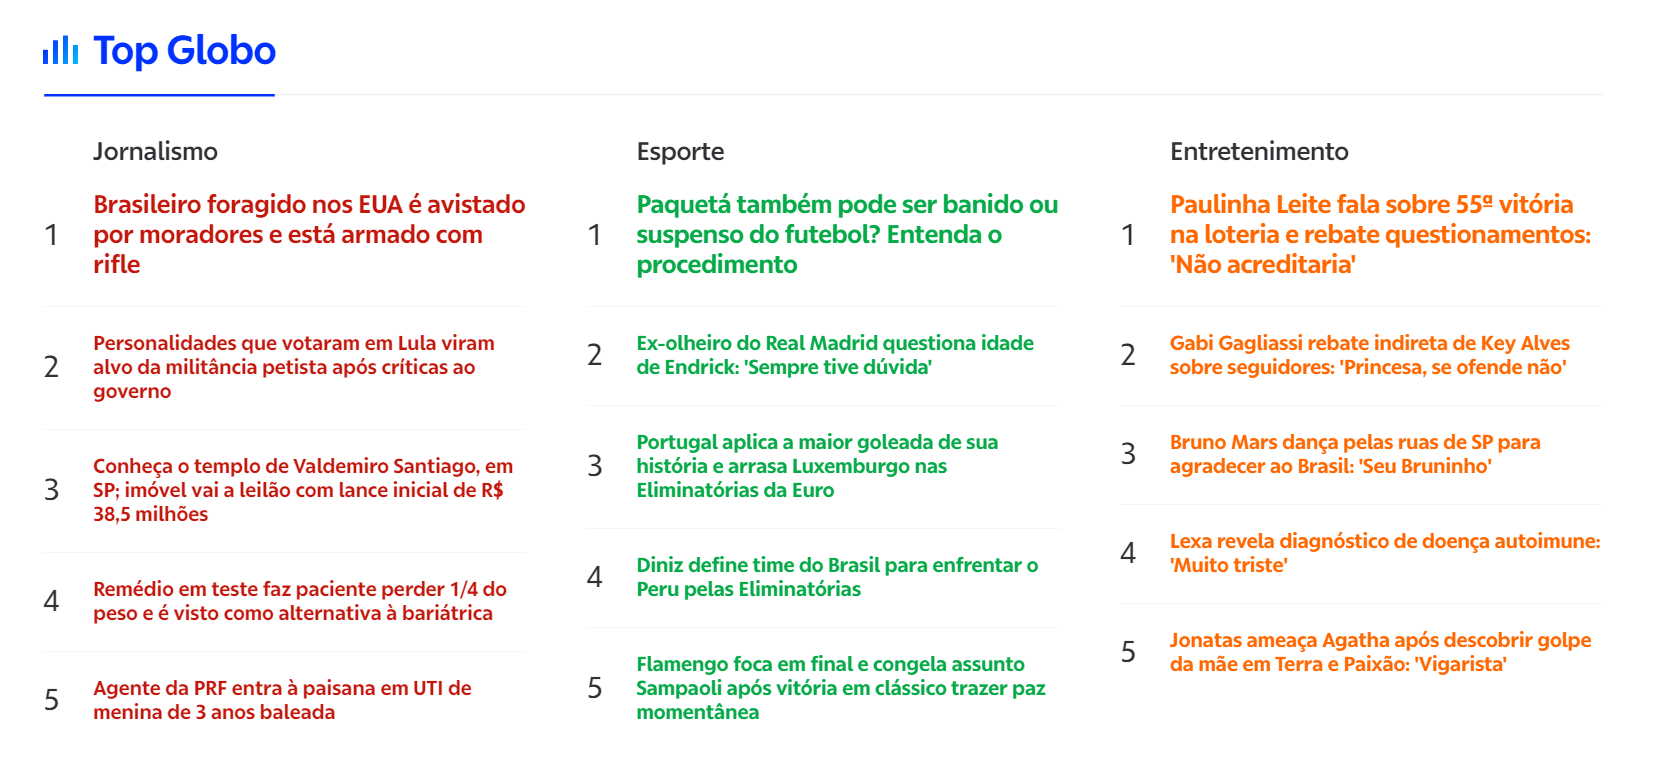

In [ ]:
# Se é a primeira vez que vai usar o BeautifulSoup, primeiro é preciso fazer sua instalação
#lembre-se que a instalação só precisa ser feita na 1a vez que vamos usar
#esse comando instala a biblioteca direto pelo jupyter notebook (sem precisar entrar no terminal)

!pip install beautifulsoup4 

In [1]:
# importando as bibliotecas que serão utilizadas
import requests # para fazer requisições ao site 
from bs4 import BeautifulSoup #para analisar e extrair informações de documentos HTML e XML, ou seja, serve para páginas da internet

In [2]:
# definindo a página que queremos extrair informações
url = 'https://www.globo.com/'

In [4]:
# fazendo a requisição à url 
# queremos como resposta (response 200) =  resposta bem-sucedida a uma solicitação
requests.get(url) 

<Response [200]>

In [10]:
#Salvando o resultado da solicitação é armazenado em uma variável chamada response
response = requests.get(url)


In [11]:
# vamos criar um objeto BeautifulSoup a partir de um conteúdo HTML(da minha pagina globo.com)
# o conteúdo veio de 'response.content'
soup = BeautifulSoup(response.content, 'html.parser') # estou especificando o arquivo(response.content) e o formato do conteúdo('html.parser')


In [ ]:
# de curiosidade, veja a cara da variável soup criada ( ela é o 'codigo' que forma a pag globo.com)
soup

In [16]:
#agora vamos investigar as tags paga encontrar o titulo da noticia
# o .find faz essa busca
noticias_html =soup.find('li', class_='topglobocom__ranking__content-item')
noticias_html

<li class="topglobocom__ranking__content-item"><div class="post"><a class="post__link" data-tracking-label="https://g1.globo.com/rj/rio-de-janeiro/noticia/2023/10/05/policia-encontra-corpos-que-seriam-de-traficantes-responsaveis-por-executar-medicos-no-rio-de-janeiro.ghtml" data-tracking-view="true" href="https://g1.globo.com/rj/rio-de-janeiro/noticia/2023/10/05/policia-encontra-corpos-que-seriam-de-traficantes-responsaveis-por-executar-medicos-no-rio-de-janeiro.ghtml" title="Achados em dois carros corpos de supostos executores de médicos no RJ"><h2 class="post__title">Achados em dois carros corpos de supostos executores de médicos no RJ</h2></a></div></li>

In [17]:
#encontrando o titulo da noticia
noticias_html.find('a')['title']

'Achados em dois carros corpos de supostos executores de médicos no RJ'

In [ ]:
# confira se bate com a 1a noticia das top news

In [18]:
#encontrando o link da noticia
noticias_html.find('a')['href']

'https://g1.globo.com/rj/rio-de-janeiro/noticia/2023/10/05/policia-encontra-corpos-que-seriam-de-traficantes-responsaveis-por-executar-medicos-no-rio-de-janeiro.ghtml'

In [19]:
# já fizemos o passo a passo para encontrar uma. Agora vamos encontrar todas (find_all):

noticias_html = soup.find_all('li', class_='topglobocom__ranking__content-item')
noticias = []
for noticia in noticias_html:
    titulo = noticia.find('a')['title']
    link = noticia.find('a')['href']
    noticias.append({'titulo': titulo, 'link': link})
    
print(noticias)

[{'titulo': 'Achados em dois carros corpos de supostos executores de médicos no RJ', 'link': 'https://g1.globo.com/rj/rio-de-janeiro/noticia/2023/10/05/policia-encontra-corpos-que-seriam-de-traficantes-responsaveis-por-executar-medicos-no-rio-de-janeiro.ghtml'}, {'titulo': 'Investigação crê em vingança e engano no caso dos médicos mortos no RJ', 'link': 'https://g1.globo.com/rj/rio-de-janeiro/noticia/2023/10/06/traficantes-que-mataram-medicos-no-rio-foram-vingar-morte-de-parceiro-assassinado-por-filho-de-miliciano-diz-investigacao.ghtml'}, {'titulo': 'Único médico que sobreviveu a ataque teria levado 14 tiros e passou por cirurgia de 10 horas ', 'link': 'https://oglobo.globo.com/rio/noticia/2023/10/06/medico-sobrevivente-de-ataque-na-barra-teria-levado14-tiros-e-passou-por-cirurgia-de-10-horas.ghtml'}, {'titulo': 'Execução de médicos no Rio: áudio leva à hipótese de que crime foi engano; ouça', 'link': 'https://g1.globo.com/rj/rio-de-janeiro/noticia/2023/10/05/audio-e-pista-da-policia-

In [20]:
# Apresentando de uma forma mais amigável:
for dicionario in noticias:
    print(f"{dicionario['titulo']}")
    print(f"{dicionario['link']}")
    print()

Achados em dois carros corpos de supostos executores de médicos no RJ
https://g1.globo.com/rj/rio-de-janeiro/noticia/2023/10/05/policia-encontra-corpos-que-seriam-de-traficantes-responsaveis-por-executar-medicos-no-rio-de-janeiro.ghtml

Investigação crê em vingança e engano no caso dos médicos mortos no RJ
https://g1.globo.com/rj/rio-de-janeiro/noticia/2023/10/06/traficantes-que-mataram-medicos-no-rio-foram-vingar-morte-de-parceiro-assassinado-por-filho-de-miliciano-diz-investigacao.ghtml

Único médico que sobreviveu a ataque teria levado 14 tiros e passou por cirurgia de 10 horas 
https://oglobo.globo.com/rio/noticia/2023/10/06/medico-sobrevivente-de-ataque-na-barra-teria-levado14-tiros-e-passou-por-cirurgia-de-10-horas.ghtml

Execução de médicos no Rio: áudio leva à hipótese de que crime foi engano; ouça
https://g1.globo.com/rj/rio-de-janeiro/noticia/2023/10/05/audio-e-pista-da-policia-para-linha-de-investigacao-que-aponta-traficantes-como-autores-de-ataque-a-medicos-por-engano.ghtml